To disable all warnings:

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Nonbipartite (Cardinality) Matching Problem

In this tutorial, the Python library "NetworkX" is required to solve the nonbipartite matching problem. 

In [2]:
import numpy as np
import networkx as nx

# Problem 03

A sports team wants to pair each player with a teammate in order to accelerate the integration of its players within the team. The players' language knowledge plays an important role in their communication. A solution is sought to find the maximum number of matches.

| Player no | Language |
| :------: | :----: |
| 1 | Turkish |
| 2 | Turkish |
| 3 | Turkish |
| 4 | English |
| 5 | French |
| 6 | English |
| 7 | Russian |
| 8 | English, Russian |
| 9 | Turkish, French |
| 10 | Arabic, Turkish |

The Python library "NetworkX" supports undirected graphs with self loops through the class Graph.

In [3]:
G1 = nx.Graph()
G1.add_nodes_from([
    ("1", {"color": "black"}),
    ("2", {"color": "black"}),
    ("3", {"color": "black"}),
    ("4", {"color": "black"}),
    ("5", {"color": "black"}),
    ("6", {"color": "black"}),
    ("7", {"color": "black"}),
    ("8", {"color": "black"}),
    ("9", {"color": "black"}),
    ("10", {"color": "black"}),
])

Now, we can define the positions(as the coordinates "x,y" on a 2D plane) of the nodes(vertices).

In [4]:
nodepos = nx.random_layout(G1, center=[0.5, 0.5], dim=2, seed=2)

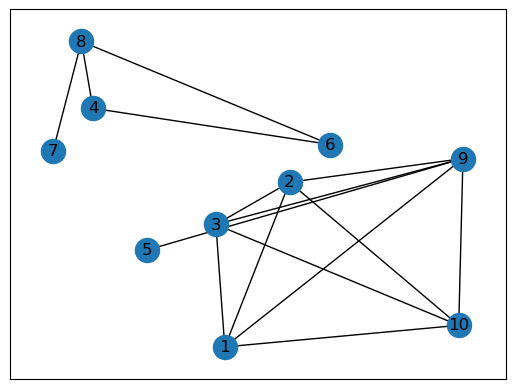

In [5]:
elist = [("1", "2"),
         ("1", "3"),
         ("1", "9"),
         ("1", "10"),
         ("2", "3"),
         ("2", "9"),
         ("2", "10"),
         ("3", "9"),
         ("3", "10"),
         ("4", "6"),
         ("4", "8"),
         ("5", "9"),
         ("6", "8"),
         ("7", "8"),
         ("9", "10")]
G1.add_edges_from(elist)
nx.draw_networkx_nodes(G1, pos = nodepos)
nx.draw_networkx_labels(G1, pos = nodepos)
nx.draw_networkx_edges(G1, pos = nodepos, edgelist=elist, arrows=True, connectionstyle='arc3, rad = 0')
#nx.draw_networkx_edge_labels(G1, pos = nodepos, edge_labels = nx.get_edge_attributes(G1,'weight'), label_pos = 0.5, verticalalignment = 'bottom')

To get information on the graph "G1":

In [6]:
print(G1)

Graph with 10 nodes and 15 edges


To get the sparse adjacency matrix (in compressed sparse row format) of the graph "G1":

In [7]:
G1Adj = nx.adjacency_matrix(G1)
print(G1Adj)

  (0, 1)	1
  (0, 2)	1
  (0, 8)	1
  (0, 9)	1
  (1, 0)	1
  (1, 2)	1
  (1, 8)	1
  (1, 9)	1
  (2, 0)	1
  (2, 1)	1
  (2, 8)	1
  (2, 9)	1
  (3, 5)	1
  (3, 7)	1
  (4, 8)	1
  (5, 3)	1
  (5, 7)	1
  (6, 7)	1
  (7, 3)	1
  (7, 5)	1
  (7, 6)	1
  (8, 0)	1
  (8, 1)	1
  (8, 2)	1
  (8, 4)	1
  (8, 9)	1
  (9, 0)	1
  (9, 1)	1
  (9, 2)	1
  (9, 8)	1


To have the adjacency matrix of the graph "G1" in dense form:

In [8]:
G1_dense = np.array(G1Adj.todense())
print(G1_dense)

[[0 1 1 0 0 0 0 0 1 1]
 [1 0 1 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 1 0 1 1 0 0 0]
 [1 1 1 0 1 0 0 0 0 1]
 [1 1 1 0 0 0 0 0 1 0]]


In [9]:
maxmatching = nx.max_weight_matching(G1, maxcardinality=True, weight=None)
print(maxmatching)

{('10', '1'), ('4', '6'), ('8', '7'), ('9', '5'), ('2', '3')}
